In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import os
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_extracted.csv')

In [3]:
data.shape

(266386, 34)

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
data.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,playlist_duration_ms,num_artists,description,pos,artist_name,track_uri,artist_uri,track_name,album_uri,track_duration_ms,album_name,Name,Album,Artist,Release_date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature
0,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,Missy Elliott,2005-07-04,226863.0,67.0,0.03110,0.904,0.813,0.006970,0.0471,-7.105,0.1210,125.461,4.0
1,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,1,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,Toxic,In The Zone,Britney Spears,2003-11-13,198800.0,81.0,0.02490,0.774,0.838,0.025000,0.2420,-3.914,0.1140,143.040,4.0
2,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,2,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),Crazy In Love (feat. Jay-Z),Dangerously In Love (Alben für die Ewigkeit),Beyoncé,2003-06-23,235933.0,21.0,0.00238,0.664,0.758,0.000000,0.0598,-6.583,0.2100,99.259,4.0
3,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,3,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,Rock Your Body,Justified,Justin Timberlake,2002-11-04,267266.0,76.0,0.20100,0.892,0.714,0.000234,0.0521,-6.055,0.1410,100.972,4.0
4,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,4,Shaggy,1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,It Wasn't Me,Hot Shot (International Version #2),Shaggy,2000,227600.0,0.0,0.05610,0.853,0.606,0.000000,0.3130,-4.596,0.0713,94.759,4.0


## Ad Hoc hypothesis
Enery will be highly correlated with danceability.
Acousticness will be correlated with instrumentalness and speechiness.
Acousticness might be negatively correalted with Loudness.
Liveness and Temp might be correlated.

In [6]:
df = data.iloc[:,18:]

In [7]:
df.drop(['album_name','Name','Album'], axis=1, inplace=True)

In [8]:
df["Release_date"] = df["Release_date"].astype(str)
df["Release_date"] = pd.to_datetime(df["Release_date"], errors = 'coerce')
df['year'] = pd.DatetimeIndex(df['Release_date']).year
df.head()

,Artist,Release_date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,year
0,Missy Elliott,2005-07-04,226863.0,67.0,0.03110,0.904,0.813,0.006970,0.0471,-7.105,0.1210,125.461,4.0,2005.0
1,Britney Spears,2003-11-13,198800.0,81.0,0.02490,0.774,0.838,0.025000,0.2420,-3.914,0.1140,143.040,4.0,2003.0
2,Beyoncé,2003-06-23,235933.0,21.0,0.00238,0.664,0.758,0.000000,0.0598,-6.583,0.2100,99.259,4.0,2003.0
3,Justin Timberlake,2002-11-04,267266.0,76.0,0.20100,0.892,0.714,0.000234,0.0521,-6.055,0.1410,100.972,4.0,2002.0
4,Shaggy,2000-01-01,227600.0,0.0,0.05610,0.853,0.606,0.000000,0.3130,-4.596,0.0713,94.759,4.0,2000.0


In [9]:
df_copy = df.copy()

In [10]:
df_copy.drop(['Artist','Release_date'], axis = 1, inplace =True)

In [11]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,266378.0,234136.056007,73671.787247,0.0,198266.0000,224866.000000,258613.000000,5279768.000
Popularity,266378.0,35.690125,28.995444,0.0,0.0000,40.000000,62.000000,92.000
Acousticness,266378.0,0.230163,0.273576,0.0,0.0208,0.104000,0.357000,0.996
Danceability,266378.0,0.605974,0.159522,0.0,0.5010,0.614000,0.721000,0.991
Energy,266378.0,0.647242,0.208400,0.0,0.5140,0.676000,0.811000,1.000
Instrumentalness,266378.0,0.054497,0.183952,0.0,0.0000,0.000003,0.000732,0.999
Liveness,266378.0,0.189532,0.155606,0.0,0.0944,0.126000,0.241000,1.000
Loudness,266378.0,-7.205637,3.573762,-60.0,-8.6270,-6.453000,-4.879000,2.766
Speechiness,266378.0,0.093167,0.099511,0.0,0.0356,0.050100,0.101000,0.962
Tempo,266378.0,121.657421,28.768129,0.0,99.5150,120.518500,139.995000,232.080


*   Tempo,Loudness,Popularity, Length and track_duration has higher std, hence data in these is highly scattered. Hence, these are least variables contains least reliable data.
*   Duration of any track and length cannot be 0. Hence, data in any track might be missing or be stored as 0.

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266386 entries, 0 to 266385
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Length            266378 non-null  float64
 1   Popularity        266378 non-null  float64
 2   Acousticness      266378 non-null  float64
 3   Danceability      266378 non-null  float64
 4   Energy            266378 non-null  float64
 5   Instrumentalness  266378 non-null  float64
 6   Liveness          266378 non-null  float64
 7   Loudness          266378 non-null  float64
 8   Speechiness       266378 non-null  float64
 9   Tempo             266378 non-null  float64
 10  Time_signature    266378 non-null  float64
 11  year              266298 non-null  float64
dtypes: float64(12)
memory usage: 24.4 MB


In [13]:
df_copy['Length'] = (df['Length']/1000).round(2)

In [14]:
def detailed_analysis(data, pred=None):
    obs = data.shape[0]
    types = data.dtypes
    counts = data.apply(lambda x:x.count())
    uniques = data.apply(lambda x: x.unique())
    nulls = data.apply(lambda x:x.isnull().sum())
    distincts = data.apply(lambda x:x.nunique())
    missing_ratio = (data.isnull().sum()/obs)*100
    skewness = data.skew()
    kurtosis = data.kurt()
    print('Data shape:', data.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'nulls', 'distincts', 
                'missing ratio', 'uniques', 'skewness', 'kurtosis']
        details = pd.concat([types, counts, nulls, distincts, missing_ratio, uniques, skewness, kurtosis], axis=1)
    else:
        corr = data.corr()[pred]
        details = pd.concat([types, counts, nulls, distincts, missing_ratio, uniques, skewness, kurtosis, corr], axis=1, sort=False)
        corr_col = 'corr ' + pred
        cols = ['types', 'counts', 'nulls', 'distincts', 'missing ratio', 'uniques', 'skewness', 'kurtosis', corr_col]

    details.columns = cols
    dtypes = details.types.value_counts()
    print('____________________________\nData types:\n', dtypes)
    print('____________________________')
    return details

In [15]:
details = detailed_analysis(df_copy, 'Energy')
display(details.sort_values(by='corr Energy', ascending=False))

Data shape: (266386, 12)
____________________________
Data types:
 float64    12
Name: types, dtype: int64
____________________________


,types,counts,nulls,distincts,missing ratio,uniques,skewness,kurtosis,corr Energy
Energy,float64,266378,8,1849,0.003003,"[0.813, 0.838, 0.758, 0.714, 0.606, 0.788, 0.5...",-0.613184,-0.155363,1.000000
Loudness,float64,266378,8,17375,0.003003,"[-7.105, -3.914, -6.583, -6.055, -4.596, -4.66...",-2.099103,9.551258,0.748872
Time_signature,float64,266378,8,5,0.003003,"[4.0, 3.0, 1.0, 5.0, 0.0, nan]",-4.743120,38.664825,0.170368
Liveness,float64,266378,8,1720,0.003003,"[0.0471, 0.242, 0.0598, 0.0521, 0.313, 0.0377,...",2.214114,5.717518,0.169369
Tempo,float64,266378,8,49391,0.003003,"[125.461, 143.04, 99.259, 100.972, 94.759, 104...",0.340419,-0.202884,0.166864
year,float64,266298,88,81,0.033035,"[2005.0, 2003.0, 2002.0, 2000.0, 2004.0, 1999....",-2.121656,4.407029,0.085713
Danceability,float64,266378,8,1069,0.003003,"[0.904, 0.774, 0.664, 0.892, 0.853, 0.881, 0.6...",-0.313116,-0.122215,0.081808
Speechiness,float64,266378,8,1482,0.003003,"[0.121, 0.114, 0.21, 0.141, 0.0713, 0.168, 0.1...",2.547190,8.444237,0.055022
Popularity,float64,266378,8,93,0.003003,"[67.0, 81.0, 21.0, 76.0, 0.0, 77.0, 65.0, 82.0...",-0.040862,-1.529618,0.040811
Length,float64,266378,8,25937,0.003003,"[226.86, 198.8, 235.93, 267.27, 227.6, 250.37,...",13.012331,587.458447,-0.017153


In [16]:
df_copy = df_copy.dropna()

In [17]:
df_copy.isnull().sum()

Length              0
Popularity          0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Liveness            0
Loudness            0
Speechiness         0
Tempo               0
Time_signature      0
year                0
dtype: int64

In [18]:
df_copy.shape

(266298, 12)

In [19]:
df_copy['Age'] = 2022 - df_copy['year']

In [20]:
df_copy.columns

Index(['Length', 'Popularity', 'Acousticness', 'Danceability', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo',
       'Time_signature', 'year', 'Age'],
      dtype='object')

In [21]:
'''for i in df_copy.columns:
    fig = make_subplots(2,1)

    tr1=go.Box(x=df_copy[i],name=i+ ' Box Plot')
    tr2=go.Histogram(x=df[i],name= i +' Histogram')

    fig.add_trace(tr1,row=1,col=1)
    fig.add_trace(tr2,row=2,col=1)

    fig.update_layout(height=700, width=1000, title_text="Box Plot and Distribution of "+ i + " of Track")
    fig.show()'''

'for i in df_copy.columns:\n    fig = make_subplots(2,1)\n\n    tr1=go.Box(x=df_copy[i],name=i+ \' Box Plot\')\n    tr2=go.Histogram(x=df[i],name= i +\' Histogram\')\n\n    fig.add_trace(tr1,row=1,col=1)\n    fig.add_trace(tr2,row=2,col=1)\n\n    fig.update_layout(height=700, width=1000, title_text="Box Plot and Distribution of "+ i + " of Track")\n    fig.show()'

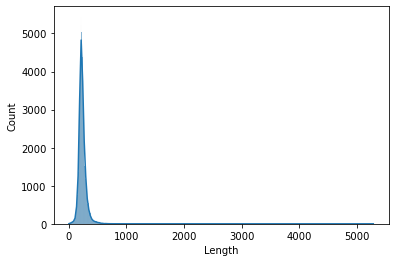

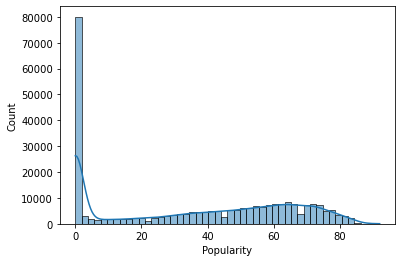

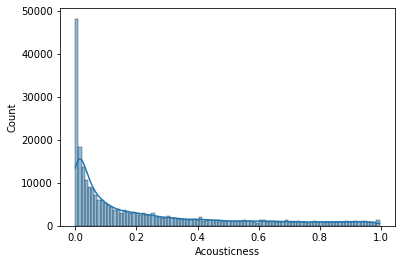

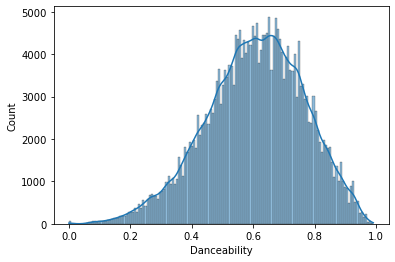

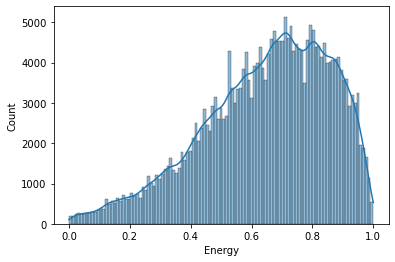

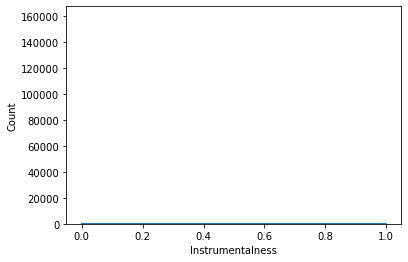

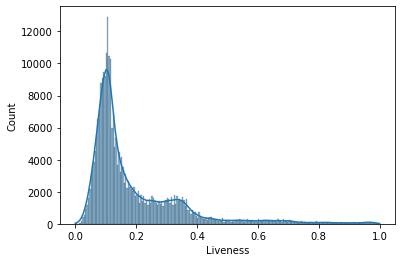

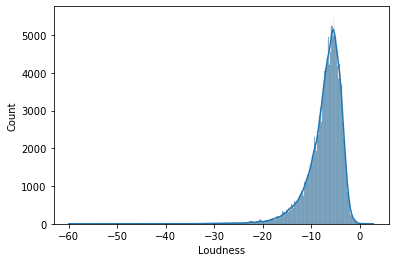

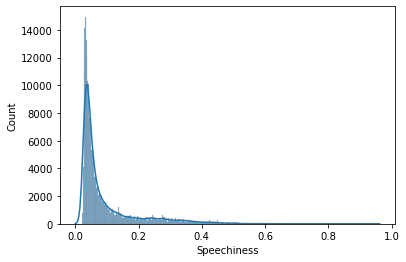

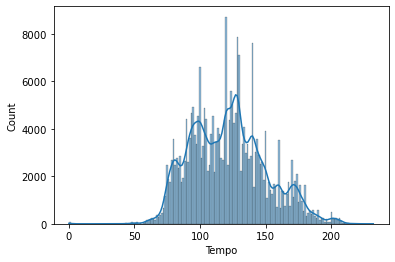

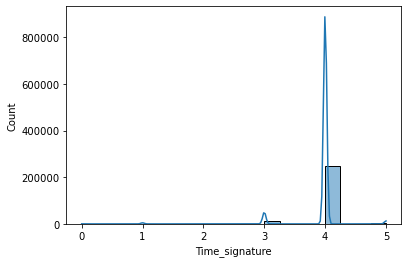

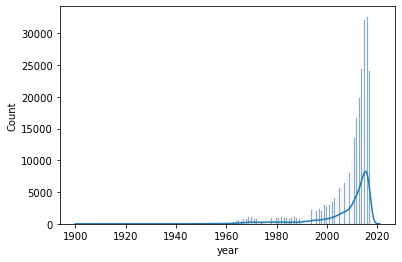

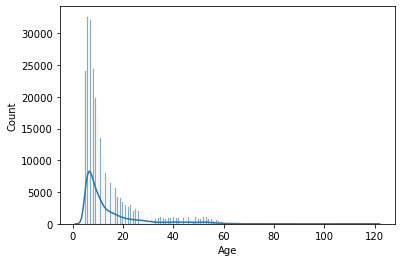

In [22]:
for i in df_copy.columns:
    sns.histplot(x = df_copy[i], kde = True)
    plt.show()

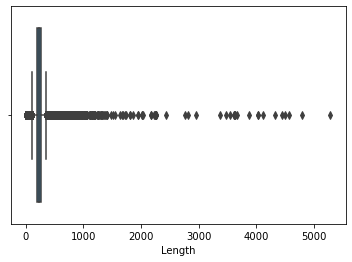

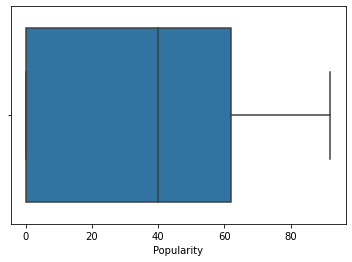

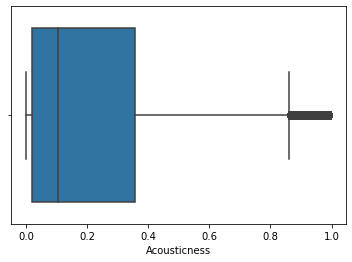

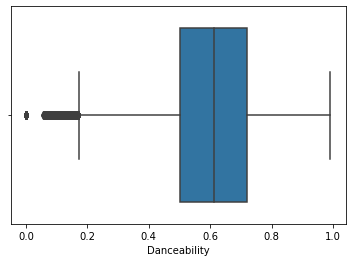

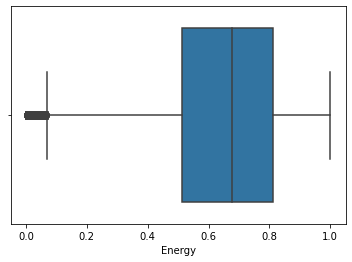

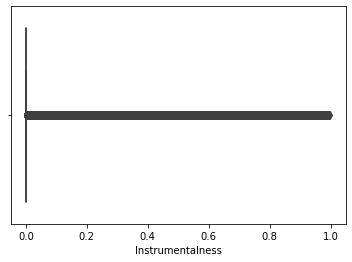

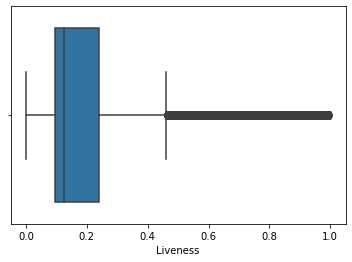

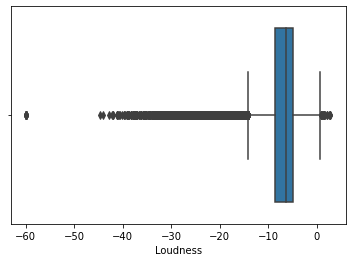

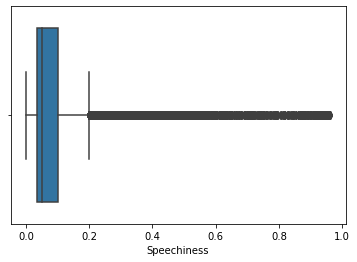

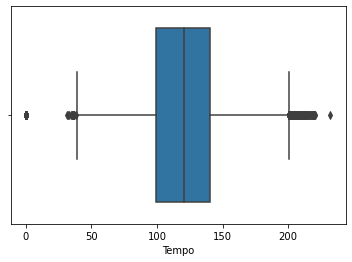

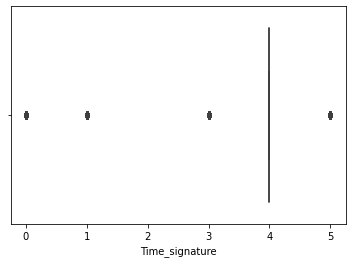

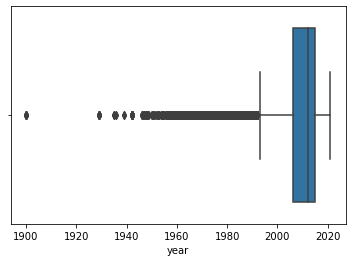

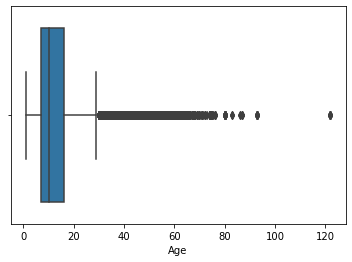

In [23]:
for i in df_copy.columns:
    sns.boxplot(x= i, data = df_copy)
    plt.show()

In [24]:
df_copy.drop(['year'], axis=1, inplace =True)

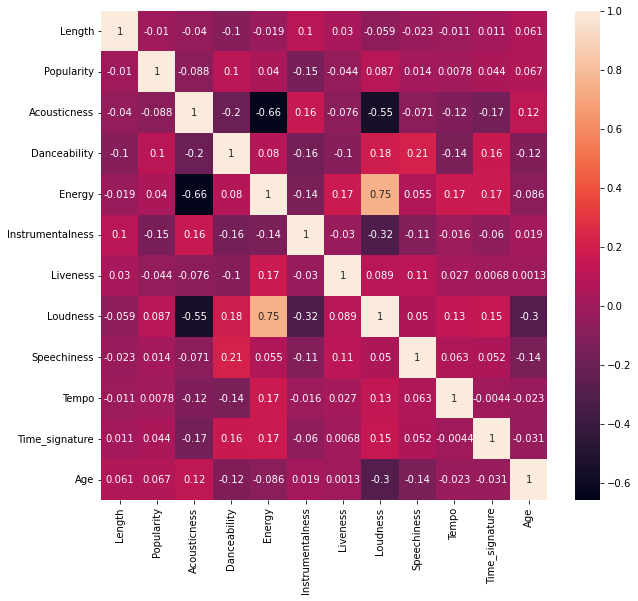

In [25]:
plt.figure(figsize = (10,9))
sns.heatmap(df_copy.corr(), annot =True)
plt.show()

- Energy & Acousticness and Loudness and Acousticness have high negative correlation. Hence, high acoustic music have less energy. Also,  acoustic music are less loud.
- Loudness and Energy have high positive correlation. Hence, higher energy music are loud.

Artist
Drake             3378
Kanye West        1483
The Weeknd        1317
Kendrick Lamar    1306
Rihanna           1256
Name: Popularity, dtype: int64


<AxesSubplot:xlabel='Artist'>

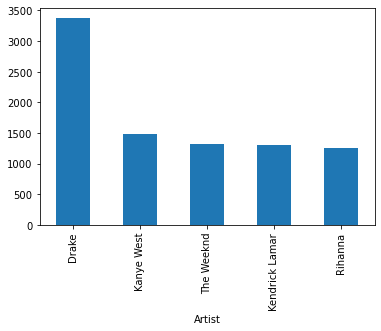

In [26]:
top_artists=df.groupby("Artist").count().sort_values(by='Popularity',ascending=False)['Popularity'][1:6]
print(top_artists)
top_artists.plot.bar()

- Drake is the most popular artist. After him, Kanye west and The weekend stand on second and third position.

In [27]:
x=pd.DataFrame(df.groupby('Artist')['Length'].sum())
x.sort_values(by='Length',ascending=False).head(n=6)

,Length
Artist,
Various Artists,1.492450e+09
Drake,8.026794e+08
Kanye West,3.683056e+08
Eminem,3.598138e+08
The Weeknd,3.473226e+08
Kendrick Lamar,3.255705e+08


Artist
Drake             3378
Kanye West        1483
The Weeknd        1317
Kendrick Lamar    1306
Rihanna           1256
Name: Danceability, dtype: int64


<AxesSubplot:ylabel='Artist'>

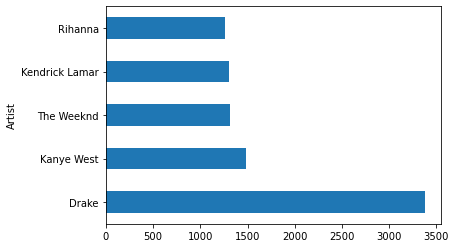

In [28]:
most_danceability=df.groupby('Artist').count().sort_values(by='Danceability',ascending=False)['Danceability'][1:6]
print(most_danceability)
most_danceability.plot.barh()

- Drake music has the most danceability.

In [29]:
df['Name'] = data['artist_name']

Text(0.5, 1.0, 'Most 10 Popular Songs On Spotify From 1900-2021')

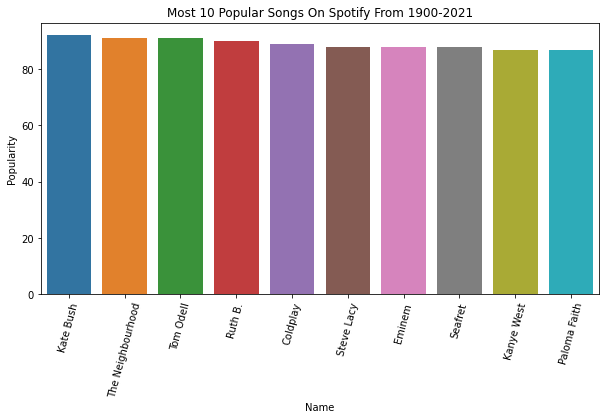

In [30]:
songs=df.groupby('Name')['Popularity'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
axis=sns.barplot(songs.index,songs)
plt.xticks(rotation=75)
plt.title("Most 10 Popular Songs On Spotify From 1900-2021")

- Kate Bush's track has been the most popular track among all the tracks.

Text(0.5, 0, 'Songs')

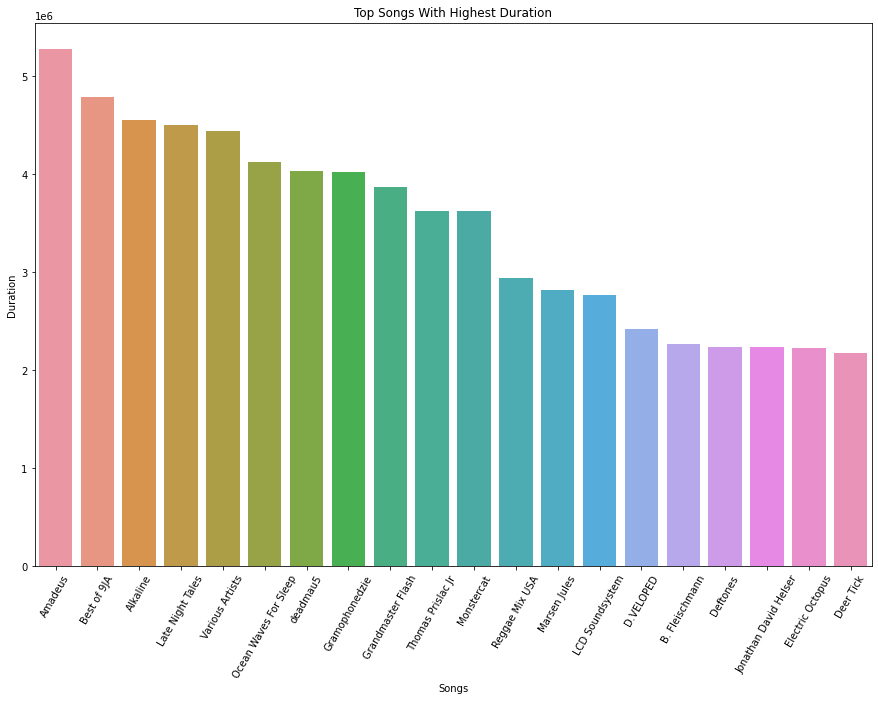

In [31]:
popular_song=df.groupby('Name')['year'].max().sort_values(ascending=False).head()
trk=df.groupby('Name')['Length'].max().sort_values(ascending=False).head(20)
plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
ax=sns.barplot(trk.index,trk)
plt.title("Top Songs With Highest Duration")
plt.ylabel('Duration')
plt.xlabel('Songs')

Text(0.5, 0, 'Songs')

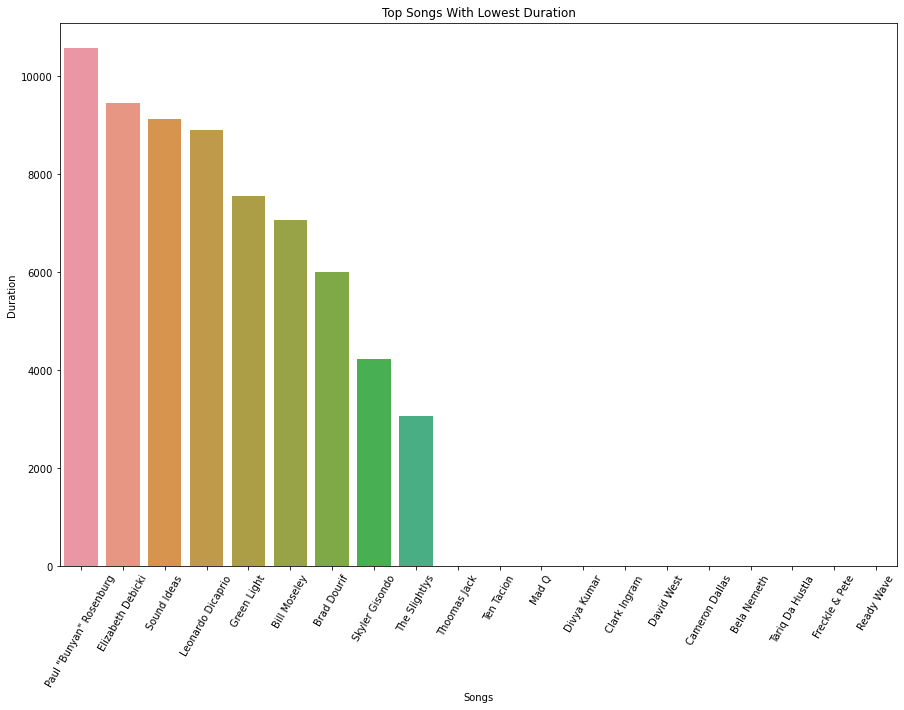

In [32]:
trk=df.groupby('Name')['Length'].max().sort_values(ascending=False).tail(20)
plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
ax=sns.barplot(trk.index,trk)
plt.title("Top Songs With Lowest Duration")
plt.ylabel('Duration')
plt.xlabel('Songs')

- Most of the data is left skewed. 
- Some variables have high kurtosis.
- Above data represents outliers.
- Normalization can be done to solve above problems.

## Conclusions:

- Popularity is affected by danceability and acousticness of tracks.
- Comparitively, songs with more danceability and energy and low acousticness have higher chances of being popular.
- Length of tracks doesn't affects popularity. Hence, any length track can be popular.